<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-285 - Computación Científica </h1>
    <h2> The Beginning </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.01 </h2>
</center>


<div id='toc' />

## Table of Contents
* [Introduction](#intro)
* [NumPy](#numpy)
* [MatPlotLib](#matplotlib)

* [Libraries](#libraries)
* [Acknowledgements](#acknowledgements)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as sym

from scipy.integrate import odeint
import scipy.linalg as spla
from scipy import optimize, interpolate
from scipy.linalg import solve_triangular, toeplitz, lu
from scipy.optimize import root
# pip install bitstring
import bitstring as bs

%matplotlib inline

sym.init_printing()
from ipywidgets import interact, widgets, fixed, IntSlider, interact_manual, Checkbox, RadioButtons
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import cm

# pip install memory_profiler
%load_ext memory_profiler

from sklearn import datasets
from colorama import Fore, Back, Style
# https://pypi.org/project/colorama/
# Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Style: DIM, NORMAL, BRIGHT, RESET_ALL
textBold = lambda x: Style.BRIGHT+x+Style.RESET_ALL
textBoldH = lambda x: Style.BRIGHT+Back.YELLOW+x+Style.RESET_ALL
textBoldB = lambda x: Style.BRIGHT+Back.BLUE+Fore.BLACK+x+Style.RESET_ALL
textBoldR = lambda x: Style.BRIGHT+Back.RED+Fore.BLACK+x+Style.RESET_ALL

<div id='intro' />

# Introduction
[Back to TOC](#toc)

In this jupyter notebook we will briefly introduce part of ecosystem in Python for Scientific Computing with explanation and examples.
We strongly suggest to follow the explanation step by step, read the suggested documents/links, and play with the jupyter notebook changing it to learn!

<div id='numpy' />

# NumPy, the core of numerical computing in Python
[Back to TOC](#toc)

We strongly suggests to take a look to the associated paper explaning Arrays in NumPy [link](https://www.nature.com/articles/s41586-020-2649-2).
Now, we will start with some examples provided in Fig. 1 from the previous reference. Also see https://numpy.org.

## a) Data structure: An array and a bi-dimensional array.

In [2]:
# NumPy array
a1 = np.arange(12)
# NumPy ndarray
a2 = np.array([[1, 2, 3], [4, 5, 6]], float)
a3 = np.reshape(a1,(4,3))

print(textBoldB(' Printing their values '))
print(textBoldH('a1:\n'),a1)
print(textBoldH('a2:\n'),a2)
print(textBoldH('a3:\n'),a3)

print(textBoldB(' Printing their datatypes '))
print(textBoldH('a1:\n'),a1.dtype)
print(textBoldH('a2:\n'),a2.dtype)
print(textBoldH('a3:\n'),a3.dtype)

print(textBoldB(' Printing their type name '))
print(textBoldH('a1:\n'),type(a1).__name__)
print(textBoldH('a2:\n'),type(a2).__name__)
print(textBoldH('a3:\n'),type(a3).__name__)

 Printing their values 
a1:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
a2:
 [[1. 2. 3.]
 [4. 5. 6.]]
a3:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
 Printing their datatypes 
a1:
 int64
a2:
 float64
a3:
 int64
 Printing their type name 
a1:
 ndarray
a2:
 ndarray
a3:
 ndarray


## b) Indexing (view)

In [3]:
print(textBoldB(' Showing original variable a3 '))
print(textBoldH('a3\n'),a3)

print(textBoldB(' Showing a subset of elements (SLICES) of variable a3 \n the second and third columns '))
print(textBoldH('a3[:,1:]\n'),a3[:,1:])
print(textBoldB(' Storing the outcome in a4 '))
a4 = a3[:,1:]

print(textBoldB(' What does it means it is a "view"? '))
print(textBoldB(' Let\'s change the original a3 and see what happens to a4. '))
a3[0,1]=100
print(textBoldH('a4\n'), a4)
print(textBoldB(' a4 has changed too! So a4 is a "view" of part of a3. '))
print('\n')
print(textBoldB(' So, how do we copy it?'))
print(textBoldB(' Let\'s use np.copy to copy the "view" obtained before,'+
                '\n then modify the original variable and see what had happened'))
a5 = np.copy(a3[:,1:])
print(textBoldH('a3\n'), a3)
print(textBoldH('a4=a3[:,1:])\n'), a4)
print(textBoldH('a5=np.copy(a3[:,1:])\n'), a5)
a3[0,1]=1
print(textBoldB(' Changing a3 as "a3[0,1]=1"'))
print(textBoldH('a3\n'), a3)
print(textBoldH('a4\n'), a4)
print(textBoldH('a5\n'), a5)
print(textBoldB(' Thus, chaning a3 have changed a4 since it is a "view" and not changed a5 since it is a copy. '))

 Showing original variable a3 
a3
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
 Showing a subset of elements (SLICES) of variable a3 
 the second and third columns 
a3[:,1:]
 [[ 1  2]
 [ 4  5]
 [ 7  8]
 [10 11]]
 Storing the outcome in a4 
 What does it means it is a "view"? 
 Let's change the original a3 and see what happens to a4. 
a4
 [[100   2]
 [  4   5]
 [  7   8]
 [ 10  11]]
 a4 has changed too! So a4 is a "view" of part of a3. 


 So, how do we copy it?
 Let's use np.copy to copy the "view" obtained before,
 then modify the original variable and see what had happened
a3
 [[  0 100   2]
 [  3   4   5]
 [  6   7   8]
 [  9  10  11]]
a4=a3[:,1:])
 [[100   2]
 [  4   5]
 [  7   8]
 [ 10  11]]
a5=np.copy(a3[:,1:])
 [[100   2]
 [  4   5]
 [  7   8]
 [ 10  11]]
 Changing a3 as "a3[0,1]=1"
a3
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
a4
 [[ 1  2]
 [ 4  5]
 [ 7  8]
 [10 11]]
a5
 [[100   2]
 [  4   5]
 [  7   8]
 [ 10  11]]
 Thus, chaning a3 have changed a4 since it is a "vi

In [4]:
print(textBoldB(' Another way to extract slices is with steps: '))
a6 = a3[:,::2]
print(textBoldH('a3\n'), a3)
print(textBoldH('a6 = a3[:,::2]\n'), a6)
print(textBoldB(' In this case we obtained the first and third columns, \n '+
               ' the pattern consider ini:end:step, where "ini" is the first index considered,\n'+
               ' "end" defines that the pattern will be considere until the index "end-1",\n'+
               ' and "step" indicates the step for selecting the next index, it is 1 by default.'))

 Another way to extract slices is with steps: 
a3
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
a6 = a3[:,::2]
 [[ 0  2]
 [ 3  5]
 [ 6  8]
 [ 9 11]]
 In this case we obtained the first and third columns, 
  the pattern consider ini:end:step, where "ini" is the first index considered,
 "end" defines that the pattern will be considere until the index "end-1",
 and "step" indicates the step for selecting the next index, it is 1 by default.


## c) Indexing (copy)

In [5]:
print(textBoldB(' Now we will list the alternatives to "copy" the data from ndarrays'))
print(textBoldH('a3\n'), a3)

print('\n')
print(textBoldR('with SCALARS:'))
print(textBoldB('o1 = a3[1,2]'))
o1 = a3[1,2]
print(textBoldH('o1\n'), o1)
print(textBoldB('Changing o1: o1 = 111'))
o1 = 111
print(textBoldH('a3\n'), a3)
print(textBoldH('o1\n'), o1)

print('\n')
print(textBoldR('with MASKS:'))
print(textBoldB('o2 = a3[a3>9]'))
o2 = a3[a3>9]
print(textBoldH('o2\n'), o2)

print('\n')
print(textBoldR('with ARRAYS:'))
print(textBoldB('o3 = a3[[0,1],[1,2]]'))
o3 = a3[[0,1],[1,2]]
print(textBoldH('o3\n'), o3)
print(textBoldH('o3:\n'),o3.dtype)
print(textBoldH('o3:\n'),type(o3).__name__)

print('\n')
print(textBoldR('with ARRAYS and BROADCASTING (this will be review next) :'))
print(textBoldB('o4 = a3[[[1],[2]],[1,0]]'))
o4 = a3[[[1],[2]],[1,0]]
print(textBoldH('o4\n'), o4)
print(textBoldH('o4:\n'),o4.dtype)
print(textBoldH('o4:\n'),type(o4).__name__)

 Now we will list the alternatives to "copy" the data from ndarrays
a3
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


with SCALARS:
o1 = a3[1,2]
o1
 5
Changing o1: o1 = 111
a3
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
o1
 111


with MASKS:
o2 = a3[a3>9]
o2
 [10 11]


with ARRAYS:
o3 = a3[[0,1],[1,2]]
o3
 [1 5]
o3:
 int64
o3:
 ndarray


with ARRAYS and BROADCASTING (this will be review next) :
o4 = a3[[[1],[2]],[1,0]]
o4
 [[4 3]
 [7 6]]
o4:
 int64
o4:
 ndarray


## d) Vectorization (THE HEART OF THE HEART OF NUMERICAL COMPUTING!!)

In [6]:
print(textBoldH('a3\n'), a3)
print(textBoldB(' We will define a new ndarray n1 = np.ones((4,3)) and add it to the array a3.'))
n1 = np.ones((4,3))

print(textBoldB(' The first implementation one may think of is the following:'))
def sum_two_arrays(a3,n1):
    out = np.zeros_like(a3) # What does this function do?
    for i in range(4):
        for j in range(3):
            out[i,j] = a3[i,j]+n1[i,j]
    return out
n2 = sum_two_arrays(a3,n1)

a3
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
 We will define a new ndarray n1 = np.ones((4,3)) and add it to the array a3.
 The first implementation one may think of is the following:


In [7]:
# To quantify the computation time it takes let's measure it:
%timeit n2 = sum_two_arrays(a3,n1)

37.1 µs ± 4.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
# The output it shows in the computer we run the experiments was:
# 33.9 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# This means it took about 34 microseconds.

# Now, let's try the NumPy way! i.e. the vectorized approach!
%timeit n2 = a3+n1

1.15 µs ± 66.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [9]:
# The output it shows in the computer we run the experiments was:
# 1.05 µs ± 12.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
# This means it was about 34 times faster!! 
# and also it only took "one" line of code where in the previous version took "7" lines of code!!
print(textBoldR(' Given the previous argument, it is crucial you get familir with VECTORIZATION computing with NumPy!! '))

 Given the previous argument, it is crucial you get familir with VECTORIZATION computing with NumPy!! 


## e) Broadcasting

In [10]:
# Creating a 1D array, this is the stringly suggested way to create "vectors" is NumPy.
# This can be considered as a row vector.
x1 = np.array([1,2,3])
print(textBoldH('x1:'),x1)
print(textBoldH('shape:'),x1.shape)
print(textBoldH('dtype:'),x1.dtype)
print(textBoldH('type name:'),type(x1).__name__)

x1: [1 2 3]
shape: (3,)
dtype: int64
type name: ndarray


In [11]:
# Creating a 2D array with one row.
x2 = x1[np.newaxis] # What does np.newaxis do?
print(textBoldH('x2:'),x2)
print(textBoldH('shape:'),x2.shape)
print(textBoldH('dtype:'),x2.dtype)
print(textBoldH('type name:'),type(x2).__name__)
# This emulates a column vector.

x2: [[1 2 3]]
shape: (1, 3)
dtype: int64
type name: ndarray


In [12]:
# Transpossing the 2D array. This emulates a column vector.
x2 = x1[np.newaxis].T
print(textBoldH('x2:'),x2)
print(textBoldH('shape:'),x2.shape)
print(textBoldH('dtype:'),x2.dtype)
print(textBoldH('type name:'),type(x2).__name__)

x2: [[1]
 [2]
 [3]]
shape: (3, 1)
dtype: int64
type name: ndarray


In [13]:
# Notice that transpossing a 1D array does not do anything (please try it by yourself!).
# Now that we have a 1D array (that emulates a row vector) and 
# a 1 column 2d array (that emulates a columns vectors), we can do a "BROADCAST" and see what happend.
x3=x1+x2
print(textBoldH('x3:'),x3)
print(textBoldH('shape:'),x3.shape)
print(textBoldH('dtype:'),x3.dtype)
print(textBoldH('type name:'),type(x3).__name__)
# In this cas we have operated elementwise and broadcasted the array.

x3: [[2 3 4]
 [3 4 5]
 [4 5 6]]
shape: (3, 3)
dtype: int64
type name: ndarray


In [14]:
# The previous operation is equivalent to the following operation.
x11 = np.tile(x1, (3,1)) # Repeat the 1d array 'vertically' 3 times
print(textBoldH('x11:'),x11)
x21 = np.tile(x2, 3) # Repeat the 2d array 'horizontally' 3 times 
print(textBoldH('x21:'),x21)
x31 = x11+x21
print(textBoldH('x31:'),x31)
print(textBoldH('shape:'),x31.shape)
print(textBoldH('dtype:'),x31.dtype)
print(textBoldH('type name:'),type(x31).__name__)
print(textBoldR(' As you may suspect, this way of doing the sum is not recommended.\n'+
               ' It was added just for comparison purposes.'))

x11: [[1 2 3]
 [1 2 3]
 [1 2 3]]
x21: [[1 1 1]
 [2 2 2]
 [3 3 3]]
x31: [[2 3 4]
 [3 4 5]
 [4 5 6]]
shape: (3, 3)
dtype: int64
type name: ndarray
 As you may suspect, this way of doing the sum is not recommended.
 It was added just for comparison purposes.


## f) Reduction

In [15]:
print(textBoldH('a3\n'), a3)

print('\n')
print(textBoldB(' First reduction, sum along axis 0:'))
print(textBoldB(' s1 = np.sum(a3,axis=0)'))
s1 = np.sum(a3,axis=0)
print(textBoldH('s1'), s1)
print(textBoldH('shape:'),s1.shape)
print(textBoldH('dtype:'),s1.dtype)
print(textBoldH('type name:'),type(s1).__name__)

print('\n')
print(textBoldB(' First reduction, sum along axis 1:'))
print(textBoldB(' s2 = np.sum(a3,axis=1)'))
s2 = np.sum(a3,axis=1)
print(textBoldH('s2'), s2)
print(textBoldH('shape:'),s2.shape)
print(textBoldH('dtype:'),s2.dtype)
print(textBoldH('type name:'),type(s2).__name__)

print('\n')
print(textBoldB(' First reduction, sum along axis 0 and 1:'))
print(textBoldB(' s3 = np.sum(a3)'))
s3 = np.sum(a3)
print(textBoldH('s3'), s3)
print(textBoldH('shape:'),s3.shape)
print(textBoldH('dtype:'),s3.dtype)
print(textBoldH('type name:'),type(s3).__name__)

print('\n')
print(textBoldR(' As you may suspect, the reduction reduces the dimensionality in respect of the original input.'))

a3
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


 First reduction, sum along axis 0:
 s1 = np.sum(a3,axis=0)
s1 [18 22 26]
shape: (3,)
dtype: int64
type name: ndarray


 First reduction, sum along axis 1:
 s2 = np.sum(a3,axis=1)
s2 [ 3 12 21 30]
shape: (4,)
dtype: int64
type name: ndarray


 First reduction, sum along axis 0 and 1:
 s3 = np.sum(a3)
s3 66
shape: ()
dtype: int64
type name: int64


 As you may suspect, the reduction reduces the dimensionality in respect of the original input.


## g) Examples

In [16]:
# Create a random matrix and comput its determinant
np.random.seed(0) # Fixing seed for randomnumber generator.
n = 100
A = np.random.random((n,n))
print(textBoldH('|A|:'), np.linalg.det(A))

|A|: 4.189009433279832e+24


In [17]:
# Compute matrix vector product
x = np.random.random(n)
b = A @ x
print(textBoldH('A*x:'), b)

A*x: [22.50387804 27.06165293 25.44380132 23.90306726 23.5383304  25.97354295
 25.39133786 23.23602505 24.96797807 26.35437211 24.27664139 25.67413645
 23.48460197 27.44447023 25.01080204 26.21436807 23.91089268 23.70399375
 26.22314526 23.86964466 23.34695257 24.9999494  24.89781895 24.68551405
 25.01137941 25.3997684  27.07055286 21.46566256 24.26978535 23.4243107
 24.53506025 22.71666134 26.62366171 25.82769683 24.07777227 24.0025882
 23.31802885 23.65800393 22.56287072 21.65606265 23.49534362 25.8842525
 26.99496029 22.16848876 23.42231272 22.87673568 22.68911393 22.00950553
 24.55681272 23.32897479 23.47424422 22.0042083  27.62785605 24.867569
 24.55058081 26.24970021 25.46630341 23.86956795 21.73690518 23.01731327
 25.4796017  22.83023589 25.22949757 25.50838772 25.52477344 23.8568525
 24.69135328 24.45486666 27.27024007 23.65238719 23.42199642 25.47403783
 25.11460573 27.85454033 23.02376118 23.35345807 25.94299815 23.22683254
 24.44753233 25.2004444  23.14280702 25.84015184 24.

In [18]:
# Solving a linear system of equations A*x=b, i.e. assume we know A and b and we want x.
x_out = np.linalg.solve(A,b)
print(textBoldH('x_out=A^{-1} b:'), x_out)

x_out=A^{-1} b: [0.74826798 0.18020271 0.38902314 0.03760018 0.01178774 0.99626787
 0.48819666 0.37202476 0.19617209 0.80719225 0.70575272 0.0015562
 0.77122667 0.11148275 0.94863268 0.33273608 0.45110278 0.00498091
 0.82439269 0.30816825 0.55644688 0.9266008  0.15622238 0.86732961
 0.50023893 0.92445617 0.82235505 0.44298003 0.08871177 0.03019745
 0.87423081 0.47428492 0.66369491 0.88164841 0.30465899 0.89576302
 0.02753244 0.27992568 0.8117664  0.85322032 0.9448354  0.30301127
 0.78023559 0.9851303  0.52700602 0.25259629 0.03896232 0.75965306
 0.13884538 0.38694261 0.30927788 0.41685067 0.90599899 0.42594776
 0.91274431 0.80540086 0.28837833 0.31808902 0.36984422 0.60564719
 0.67406252 0.97222984 0.92651606 0.61187172 0.04623878 0.54530762
 0.40364022 0.54477873 0.04017637 0.99576221 0.05695837 0.27267993
 0.07212403 0.54761111 0.3518183  0.37529984 0.78916752 0.90402012
 0.16569698 0.27897694 0.47272862 0.11288167 0.38653808 0.30208805
 0.92197634 0.19853412 0.7212114  0.21589321 0.

In [19]:
# Computing the norm 2, between x and x_out
print(textBoldH('||x-x_out||_2:'), np.linalg.norm(x-x_out))
# It seems it is small, why is this?

||x-x_out||_2: 2.2940419009392607e-13


In [20]:
# Computing dot product
v1 = np.random.random(n)
v2 = np.random.random(n)
print(textBoldH('dot product between v1 and v2:'), np.dot(v1,v2))

dot product between v1 and v2: 22.562561096899618


In [21]:
# Computing elementwise product
print(textBoldH('v1*v2:'), v1*v2)

v1*v2: [0.5040407  0.35124297 0.20272754 0.06808604 0.03793166 0.03130265
 0.16771434 0.03131432 0.13621973 0.08603658 0.15233759 0.63918918
 0.18470824 0.05499963 0.01482564 0.09488504 0.10792356 0.045415
 0.06367632 0.06743177 0.14068657 0.11574464 0.33993602 0.71001683
 0.02322593 0.17319421 0.04309746 0.6421034  0.2301384  0.41128254
 0.0240249  0.26253555 0.32900122 0.68786613 0.7069239  0.19076432
 0.116608   0.91879584 0.81958956 0.26540587 0.15802502 0.00093995
 0.34807158 0.42177808 0.28353462 0.08118476 0.00483724 0.12667942
 0.15228556 0.13161217 0.48897394 0.23173528 0.14190865 0.08554734
 0.40820262 0.01695295 0.04123169 0.19450118 0.07245406 0.44841639
 0.34529915 0.09043179 0.89483999 0.00454414 0.43664874 0.05455569
 0.49905853 0.06178369 0.1334216  0.16378546 0.44445211 0.25810607
 0.26141593 0.39681414 0.01200907 0.02636425 0.00702124 0.51440657
 0.11066247 0.12086425 0.3494806  0.06069188 0.29896651 0.00942196
 0.24711492 0.00450915 0.52898055 0.3297233  0.01349076 0

In [22]:
# Squaring each element of v1
print(textBoldH('out:'), np.power(v1,2))

out: [3.33712844e-01 3.35043316e-01 2.97389976e-01 3.40284824e-02
 3.23343677e-01 8.35195196e-03 4.65999923e-01 2.64784014e-03
 3.57781451e-02 8.65641121e-02 7.78026242e-02 6.59510128e-01
 8.28004335e-02 5.46977129e-03 4.62164663e-03 2.23243998e-02
 1.55387254e-01 3.87358426e-02 5.52355095e-02 3.38470418e-02
 8.92428375e-02 2.54882336e-01 9.43515134e-01 6.27248860e-01
 2.97633931e-02 6.44569231e-01 5.04232111e-01 8.20470759e-01
 1.88969944e-01 7.51860125e-01 4.87330001e-01 7.45795551e-02
 1.51925446e-01 7.03046345e-01 6.52399127e-01 6.02731826e-02
 6.99354020e-01 8.94456439e-01 7.70479222e-01 1.45380560e-01
 2.92856089e-01 7.15649408e-01 5.13229573e-01 5.02829816e-01
 8.13683961e-02 3.73078949e-01 2.96601313e-03 8.82965771e-02
 4.11233243e-02 1.49780281e-01 5.44982922e-01 6.78816793e-02
 3.20106099e-02 7.09024079e-01 8.37404284e-01 1.99109251e-01
 5.97791604e-02 6.36885484e-02 1.73205699e-01 6.43914668e-01
 3.15261678e-01 3.33316796e-01 9.56791734e-01 6.03343621e-03
 2.25637724e-01 2.2

<div id='matplotlib' />

# MatPlotLib, comprehensive 2-D plotting
[Back to TOC](#toc)

In this case, we will go straight to the examples. See https://matplotlib.org and https://github.com/matplotlib/cheatsheets#cheatsheets.

In [23]:
def plot_trig_func(n=5):
    x = np.linspace(0,10,n) # Generates a linearly spaced set of n points from 0 to 10
    y1 = np.sin(x) # Vectorization in action!
    y2 = np.cos(x) # Vectorization in action!
    plt.figure(figsize=(5,5)) # Creating the figure
    plt.plot(x,y1,label=r'$\sin(x)$') # Plotting sin
    plt.plot(x,y2,'r.-',label=r'$\cos(x)$') # Plotting cos
    plt.grid(True) # Adding nice grid
    plt.legend(loc='best') # Adding legend
    plt.title('Plotting trigonometric functions') # Adding title
    plt.xlabel(r'$x$') # Adding x-label
    plt.ylabel(r'$y$') # Adding y-label
    plt.show() # Showing the plot
# The following is a iPython widget called interact, 
# it allows us to interact with the function that it is being called.
interact(plot_trig_func,n=(3,1000,1)) # Making this 'tunable'!

interactive(children=(IntSlider(value=5, description='n', max=1000, min=3), Output()), _dom_classes=('widget-i…

<function __main__.plot_trig_func(n=5)>

In [24]:
def plot_funct_2_var(theta=0):
    x = np.linspace(-2,2,20)
    y = x # Recall this is just a 'view'

    X, Y = np.meshgrid(x,y) # It generates two 2D arrays with with cartesian product of 'x' and 'y'.    

    # 'lambda' definition help us to organize better the code
    f = lambda x,y: np.sin(x*np.sin(theta)+y*np.cos(theta))*np.exp(-(x**2+y**2))
    Z = f(X,Y) # Evaluation a function of two variables

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle('Comparison of two ways of plotting $f(x,y)$')

    # This is useful for images.
    ax1.imshow(Z, cmap='hot', interpolation='nearest')
    ax1.set_ylabel('imshow')

    # This is useful for functions in two variables, i.e. z=f(x,y)
    ax2.pcolormesh(X,Y,Z,cmap='hot', shading='auto')
    ax2.axis('equal')
    ax2.set_ylabel('pcolormesh')
    plt.show()
interact(plot_funct_2_var,theta=(0,2*np.pi,2*np.pi/50))

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.12566370614359…

<function __main__.plot_funct_2_var(theta=0)>

In [25]:
def plot_funct_2_var_3D(theta=0):
    x = np.linspace(-2,2,40)
    y = x # Recall this is just a 'view'

    X, Y = np.meshgrid(x,y) # It generates two 2D arrays with with cartesian product of 'x' and 'y'.    

    # 'lambda' definition help us to organize better the code
    f = lambda x,y: np.sin(x*np.sin(theta)+y*np.cos(theta))*np.exp(-(x**2+y**2))
    Z = f(X,Y) # Evaluation a function of two variables

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap='hot', linewidth=2, antialiased=True)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
interact(plot_funct_2_var_3D,theta=(0,2*np.pi,2*np.pi/50))

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.12566370614359…

<function __main__.plot_funct_2_var_3D(theta=0)>

<div id='scipy' />

# SciPy, fundamental library for scientific computing
[Back to TOC](#toc)

In this case, we will go straight to the examples. See https://www.scipy.org.

In [26]:
# Numerical Integration
import scipy.integrate as integrate

# Integrating $\int_0^1 \exp(-x^2)\,dx$
result = integrate.quad(lambda x: np.exp(-x**2), 0, 1)
print(result)

# Integrating $\int_0^1 1\,dx=1$
result = integrate.quad(lambda x: 1, 0, 1)
print(result)

(0.7468241328124271, 8.291413475940725e-15)
(1.0, 1.1102230246251565e-14)


In [27]:
# Minimization
from scipy.optimize import minimize
f = lambda x: np.sin(x[0])*(1+np.cos(x[1]))

x0 = np.array([0, 0])
res = minimize(f, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 88
         Function evaluations: 175
[-1.57079632e+00 -1.44645246e-08]


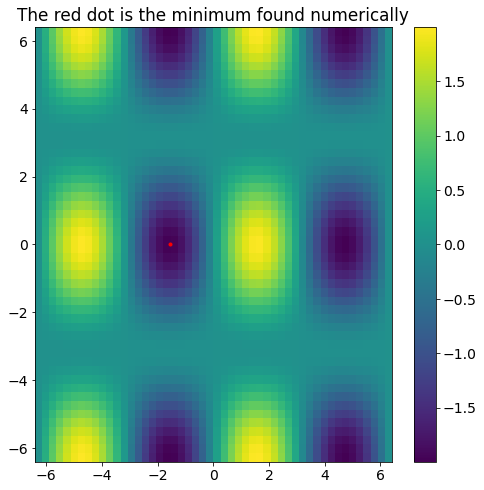

In [28]:
# Plotting the previous function
x = np.linspace(-2*np.pi,2*np.pi)
y = x
X,Y = np.meshgrid(x,y)
f = lambda x,y: np.sin(x)*(1+np.cos(y))
Z = f(X,Y)
plt.figure(figsize=(8,8))
plt.pcolormesh(X,Y,Z,shading='auto')
plt.plot(res.x[0],res.x[1],'r.')
plt.colorbar()
plt.title('The red dot is the minimum found numerically')
plt.show()

In [29]:
# root finding
from scipy.optimize import root
f = lambda x: x - 0.5 * np.exp(x)
sol = root(f, 0.3)
print(sol)

    fjac: array([[-1.]])
     fun: array([-0.30685295])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 28
     qtf: array([0.30685295])
       r: array([-5.23532303e-05])
  status: 5
 success: False
       x: array([0.69365795])


<div id='sympy' />

# SymPy, symbolic mathematics
[Back to TOC](#toc)

In this case, we will go straight to the examples. See https://www.sympy.org/en/index.html.

In [30]:
# Working with algebraic expression versus 'numerical' expressions
sym.sqrt(3)==np.sqrt(3)

False

In [31]:
sym.sqrt(3)>np.sqrt(3)

In [32]:
sym.sqrt(3)<np.sqrt(3)

In [33]:
# Defining symbolic variables
x = sym.symbols('x')
x

In [34]:
y=x**2+sym.cos(x)+(x**2+1)**2
y

In [35]:
# Expanding the terms
sym.expand(y)

In [36]:
# Computing derivatives
yp=sym.diff(y)
yp

In [37]:
# Factorization of expression
sym.factor(yp)

In [38]:
# Computing limits
sym.limit((1-sym.cos(x))/x, x, 0)

In [39]:
sym.limit((sym.sin(x))/x, x, 0)

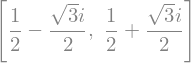

In [40]:
# Solving algebraic equations
sym.solve(x**2-x+1,x)

<div id='libraries' />

# Libraries
[Back to TOC](#toc)

### Please make sure you make all of them your BFF!!

* Scipy.org: https://www.scipy.org
* NumPy: https://www.nature.com/articles/s41586-020-2649-2
* IEEE 754 Floating Point Special Values: https://docs.scipy.org/doc/numpy-1.10.0/user/misc.html
* Matplotlib: http://matplotlib.org/examples/pylab_examples/simple_plot.html
* SymPy: https://www.sympy.org/en/index.html.

<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)

* _Material originally created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`). v.1.0. DI UTFSM. August 2021._
* _Update August 2021 - v1.01 - C.Torres_ : Extending jupyter notebook.